In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np



[1,   100] loss: 0.759
[1,   200] loss: 0.174
[1,   300] loss: 0.127
[1,   400] loss: 0.120
[1,   500] loss: 0.092
[1,   600] loss: 0.082
[1,   700] loss: 0.081
[1,   800] loss: 0.076
[1,   900] loss: 0.076
Finished Training
Accuracy of the network on the 10000 test images: 98 %


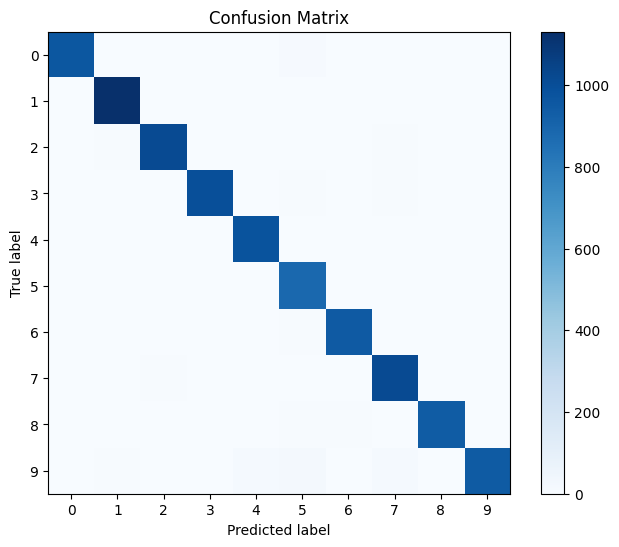

Total number of learnable parameters: 138726
model's state dict: 
net.0.weight 	 torch.Size([64, 1, 3, 3])
net.0.bias 	 torch.Size([64])
net.3.weight 	 torch.Size([128, 64, 3, 3])
net.3.bias 	 torch.Size([128])
classification_head.0.weight 	 torch.Size([20, 3200])
classification_head.0.bias 	 torch.Size([20])
classification_head.2.weight 	 torch.Size([10, 20])
classification_head.2.bias 	 torch.Size([10])

Optimizer's state dict: 
state 	 {}
param_groups 	 [{'lr': 0.001, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'params': [0, 1, 2, 3, 4, 5, 6, 7]}]
EPOCH 1 
EPOCH 2 


In [3]:
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import torch
# Define CNN Classifier
class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),
            nn.Conv2d(64, 128, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2)
        )
        self.classification_head = nn.Sequential(
            nn.Linear(128 * 5 * 5, 20),  # Adjusted input size based on the output of the convolutional layers
            nn.ReLU(),
            nn.Linear(20, 10)
        )

    def forward(self, x):
        features = self.net(x)
        return self.classification_head(features.view(x.size(0), -1))

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
model = CNNClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 1
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

# Evaluating the model
model.eval()
correct = 0
total = 0
predictions = []
targets = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())
        targets.extend(labels.numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

# Display confusion matrix
conf_matrix = confusion_matrix(targets, predictions)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, np.arange(10))
plt.yticks(tick_marks, np.arange(10))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print number of learnable parameters
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('Total number of learnable parameters: %d' % total_params)


loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)
print("model's state dict: ")
for param_tensor in model.state_dict().keys():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())
print()
print("Optimizer's state dict: ")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

EPOCHS = 2
for epoch in range(EPOCHS):
    print('EPOCH {} '.format(epoch+1))

torch.save(model,"./ModelFiles/model.pt")

In [13]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define the transformation pipeline
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the FashionMNIST test dataset
mnist_testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Define batch size
batch_size = 64

# Create a DataLoader for the test dataset
test_loader = DataLoader(mnist_testset, batch_size=batch_size, shuffle=False)


In [20]:
device = torch.device("cpu")

In [21]:
model = CNNClassifier()
model = torch.load("./ModelFiles/model.pt")
model.to(device)

CNNClassifier(
  (net): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classification_head): Sequential(
    (0): Linear(in_features=3200, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=10, bias=True)
  )
)

In [23]:
print("Model's state_dict:")
for param_tensor in model.state_dict().keys():
    print(param_tensor, "\t",model.state_dict()[param_tensor].size())
print()

Model's state_dict:
net.0.weight 	 torch.Size([64, 1, 3, 3])
net.0.bias 	 torch.Size([64])
net.3.weight 	 torch.Size([128, 64, 3, 3])
net.3.bias 	 torch.Size([128])
classification_head.0.weight 	 torch.Size([20, 3200])
classification_head.0.bias 	 torch.Size([20])
classification_head.2.weight 	 torch.Size([10, 20])
classification_head.2.bias 	 torch.Size([10])



In [25]:
model.eval()
correct = 0
total = 0
for i, vdata in enumerate(test_loader):
    tinputs, tlabels = vdata
    tinputs = tinputs.to(device)
    tlabels = tlabels.to(device)
    toutputs = model(tinputs)
    #Select the predicted class label which has the
    # highest value in the output layer
    _, predicted = torch.max(toutputs, 1)
    print("True label:{}".format(tlabels))
    print('Predicted: {}'.format(predicted))
    # Total number of labels
    total += tlabels.size(0)
    # Total correct predictions
    correct += (predicted == tlabels).sum()
accuracy = 100.0 * correct / total
print("The overall accuracy is {}".format(accuracy))

True label:tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9,
        1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 1,
        2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5])
Predicted: tensor([1, 8, 1, 1, 4, 1, 4, 8, 4, 4, 0, 1, 2, 1, 0, 1, 6, 8, 0, 3, 8, 2, 2, 5,
        1, 0, 0, 6, 1, 2, 4, 2, 1, 8, 6, 5, 4, 4, 4, 1, 8, 1, 6, 2, 0, 1, 6, 1,
        8, 8, 8, 0, 4, 0, 8, 8, 2, 8, 2, 5, 2, 2, 2, 5])
True label:tensor([1, 1, 2, 3, 9, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
        0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2, 3, 6, 7, 2, 7, 8, 5, 9, 9, 4, 2, 5,
        7, 0, 5, 2, 8, 6, 7, 8, 0, 0, 9, 9, 3, 0, 8, 4])
Predicted: tensor([1, 1, 4, 4, 5, 4, 2, 5, 0, 3, 8, 1, 8, 0, 2, 8, 1, 8, 5, 1, 5, 8, 1, 8,
        8, 8, 2, 1, 8, 2, 1, 0, 5, 8, 0, 0, 3, 8, 2, 8, 2, 2, 4, 2, 1, 8, 7, 4,
        2, 8, 5, 8, 2, 4, 7, 3, 5, 8, 5, 1, 3, 8, 8, 0])
True label:tensor([1, 5, 4, 1, 9, 1, 8, 6, 2, 1, 2, 5, 1, 0, 0, 0, 1, 6, 1, 6, 2, 2, 4, 

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
import os

# Step 1: Download and extract the cats_and_dogs_filtered dataset
# Make sure you have downloaded and extracted the dataset to the appropriate directory
data_dir = os.listdir("home/student/Downloads/cats_and_dogs_filtered")

for file in data_dir:
    print(file)

# Step 2: Preprocess the images
# Define transformations for data augmentation and normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Step 3: Load the pre-trained AlexNet model
alexnet = models.alexnet(pretrained=True)

# Step 4: Modify the classifier for binary classification
num_ftrs = alexnet.classifier[6].in_features
alexnet.classifier[6] = nn.Linear(num_ftrs, 2)  # Modify the last fully connected layer for binary classification

# Step 5: Prepare the dataset for training
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=64, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Step 6: Train the model
def train_model(model, criterion, optimizer, num_epochs=10):
    model.to(device)
    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                # Forward pass
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward pass + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # Deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

        print()

    print('Best val Acc: {:4f}'.format(best_acc))

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(alexnet.parameters(), lr=0.001, momentum=0.9)

# Train the model
model_ft = train_model(alexnet, criterion, optimizer, num_epochs=10)


FileNotFoundError: [Errno 2] No such file or directory: 'home/student/Downloads/cats_and_dogs_filtered'

In [33]:
import zipfile
with zipfile.ZipFile('cats_and_dogs_filtered.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Output:
# This will extract all files from 'file.zip'
